
**Theoretical**



**1 What is a Decision Tree and how does it work?**

 A supervised learning algorithm used for classification and regression.
 Tree structure: Root Node (entire dataset), Internal Nodes (feature tests), Leaf Nodes (outcomes).

 **2  What are impurity measures in Decision Trees**

  Gini Impurity
  Entropy
  Classification Error

**3 What is the mathematical formula for Gini Impurity**

Gini Impurity: Gini = 1 - ∑(p_i^2)


**4 What is the mathematical formula for Entropy**

Entropy: Entropy = -∑(p_i * log2(p_i))


**5 What is Information Gain, and how is it used in Decision Trees**

Measures reduction in entropy after a split.
 Formula: IG = Entropy(Parent) - ∑ (|D_v| / |D|) * Entropy(D_v).

**6 What is the difference between Gini Impurity and Entropy**

 Gini: Faster computation, used in CART, range ~0 to 0.5.
 Entropy: Logarithmic, used in ID3, range 0 to 1.

**7 What is the mathematical explanation behind Decision Trees**

 Recursive partitioning to reduce impurity.
 At each node: calculate impurity, try all features, choose best split, repeat.

 **8 What is Pre-Pruning in Decision Trees**

 Pre-Pruning: Stops growth early (e.g., max depth, min samples).

 **9 What is Post-Pruning in Decision Trees**

 Post-Pruning: Builds full tree, then prunes back using validation.

**10 What is the difference between Pre-Pruning and Post-Pruning**

Pre-Pruning: During tree building	,May underfit.

Post-Pruning: After building full tree,	Better generalization.


 **11 What is a Decision Tree Regressor**

 Used for continuous targets.
 Splits to minimize variance or MSE.
 Leaf nodes contain mean/median target value.

 **12 What are the advantages and disadvantages of Decision Trees**

 Advantages: Easy to interpret, handles mixed data types, no need for feature scaling.

 Disadvantages: Overfitting, unstable, biased toward features with many categories.

**13 How does a Decision Tree handle missing values**

Imputation (mean/median), surrogate splits, or treat as separate category.

**14 How does a Decision Tree handle categorical features**

 Label Encoding, One-Hot Encoding, or use native categorical split support (in some algorithms).

**15 What are some real-world applications of Decision Trees?**

 Medical Diagnosis, Fraud Detection, Credit Scoring, Customer Segmentation,
 Churn Prediction, Loan Default Prediction, Business Decision Support.



**Practical**

In [60]:
# 16.  Write a Python program to train a Decision Tree Classifier on the Iris dataset and print the model accuracy.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
df=load_iris()
x=df.data
y=df.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)




Accuracy: 0.9666666666666667


In [61]:
# 17. Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the  feature importances
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
df=load_iris()
x=df.data
y=df.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
model=DecisionTreeClassifier(criterion='gini')
model.fit(x_train,y_train)
feature_names=df.feature_names
importance= model.feature_importances_
k= pd.DataFrame({'feature' : feature_names , 'Importance' : importance })
print(k)


             feature  Importance
0  sepal length (cm)    0.016775
1   sepal width (cm)    0.000000
2  petal length (cm)    0.516702
3   petal width (cm)    0.466523


In [62]:
# 18 Write a Python program to train a Decision Tree Classifier using Entropy as the splitting criterion and print the  model accuracy

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
df=load_iris()
x=df.data
y=df.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
model=DecisionTreeClassifier(criterion='entropy',splitter= 'best')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)


Accuracy: 0.9666666666666667


In [63]:
# 19 Write a Python program to train a Decision Tree Regressor on a housing dataset and evaluate using Mean  Squared Error (MSE)

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
df=fetch_california_housing()
x=df.data
y=df.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("MSE:",mean_squared_error(y_test,y_pred))



MSE: 0.543170383507001


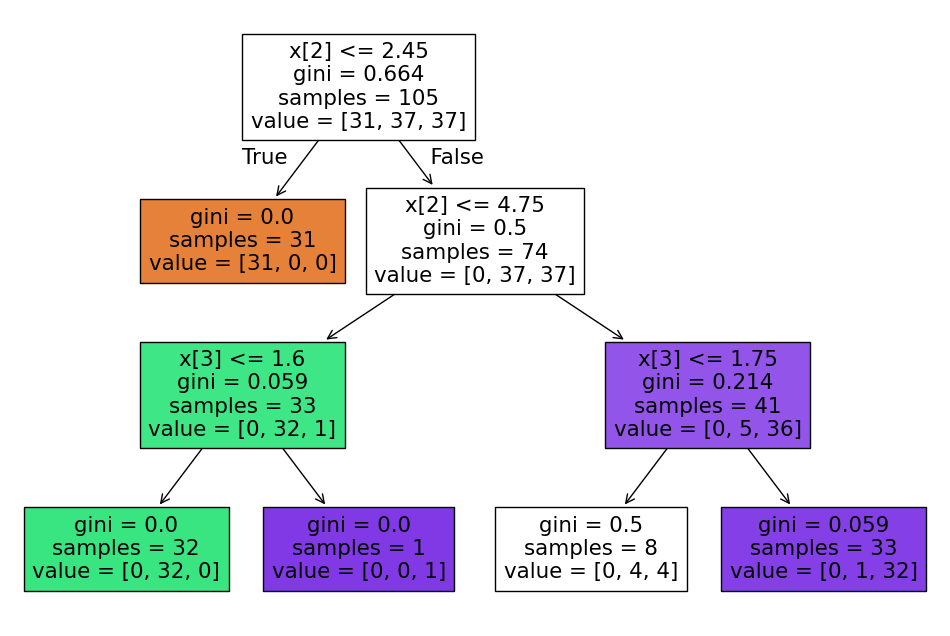

In [64]:
# 20. Write a Python program to train a Decision Tree Classifier and visualize the tree using graphviz

# Step 1: Import required libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 2: Load dataset
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf.fit(X_train, y_train)

#Visulize
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf,filled=True)
plt.show()





In [65]:
# 21  Write a Python program to train a Decision Tree Classifier with a maximum depth of 3 and compare its  accuracy with a fully grown tree.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
df=load_iris()
x=df.data
y=df.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

# Default tree
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy with full grown tree:",accuracy)


# max_depth of 3
model=DecisionTreeClassifier(max_depth=3)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy with max_depth 3 :",accuracy)


Accuracy with full grown tree: 0.9666666666666667
Accuracy with max_depth 3 : 0.9666666666666667


In [66]:
# 22. Write a Python program to train a Decision Tree Classifier using min_samples_split=5 and compare its  accuracy with a default tree

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
df=load_breast_cancer()
x=df.data
y=df.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

# Default tree
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy with full grown tree:",accuracy)


#  min_samples_split=5
model=DecisionTreeClassifier(min_samples_split=5)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy with min_samples_split 5 :",accuracy)

Accuracy with full grown tree: 0.8859649122807017
Accuracy with min_samples_split 5 : 0.8947368421052632


In [67]:
# 23 Write a Python program to apply feature scaling before training a Decision Tree Classifier and compare its accuracy with unscaled data

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
df=load_iris()
x=df.data
y=df.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

# Default tree
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy with full grown tree:",accuracy)


#  after scaling
scaler=StandardScaler()
x_scaled_train=scaler.fit_transform(x_train)
x_scaled_test=scaler.transform(x_test)
model=DecisionTreeClassifier(min_samples_split=5)
model.fit(x_scaled_train,y_train)
y_pred=model.predict(x_scaled_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy after scaling :",accuracy)

Accuracy with full grown tree: 0.9666666666666667
Accuracy after scaling : 0.9666666666666667


In [68]:
# 24  Write a Python program to train a Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass  classification

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

data = load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#in One-vs-Rest classifier
ovr_classifier = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
ovr_classifier.fit(X_train, y_train)

y_pred = ovr_classifier.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Test Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [69]:
# 25 Write a Python program to train a Decision Tree Classifier and display the feature importance scores

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
df=load_iris()
x=df.data
y=df.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
feature_names=df.feature_names
importance= model.feature_importances_
k= pd.DataFrame({'feature' : feature_names , 'Importance' : importance })
print(k)


             feature  Importance
0  sepal length (cm)    0.000000
1   sepal width (cm)    0.016775
2  petal length (cm)    0.056525
3   petal width (cm)    0.926700


In [70]:
# 26 Write a Python program to train a Decision Tree Regressor with max_depth=5 and compare its performance  with an unrestricted tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score,mean_squared_error

df=load_iris()
x=df.data
y=df.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

# Default tree
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
print("Accuracy with full grown tree:",accuracy)
print("MSE  with full grown tree:",MSE)


#  max_depth=5
model= DecisionTreeRegressor(max_depth=5)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
print(" \n Accuracy with  max_depth 5:",accuracy)
print("MSE  with max_depth 5 :",MSE)




Accuracy with full grown tree: 0.9666666666666667
MSE  with full grown tree: 0.03333333333333333
 
 Accuracy with  max_depth 5: 0.9666666666666667
MSE  with max_depth 5 : 0.03333333333333333


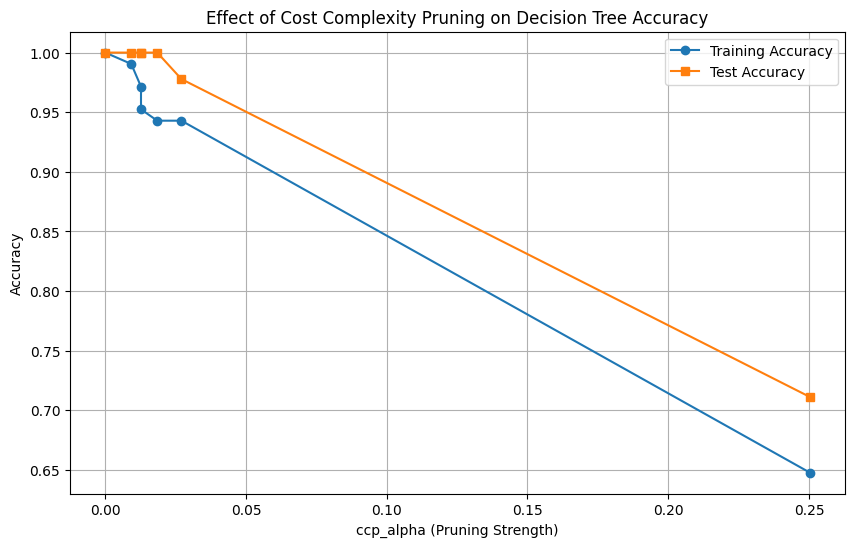

In [71]:
#27 Write a Python program to train a Decision Tree Classifier, apply Cost Complexity Pruning (CCP), and  visualize its effect on accuracy

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Step 1: Load dataset
data = load_iris()
X = data.data
y = data.target

# Step 2: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train initial model to get effective alphas for pruning
clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]  # Ignore the last alpha (makes tree with only root)
clfs = []

# Step 4: Train trees for each ccp_alpha
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Step 5: Collect training and test accuracies
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

# Step 6: Plot the effect of ccp_alpha on accuracy
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label='Training Accuracy')
plt.plot(ccp_alphas, test_scores, marker='s', label='Test Accuracy')
plt.xlabel('ccp_alpha (Pruning Strength)')
plt.ylabel('Accuracy')
plt.title('Effect of Cost Complexity Pruning on Decision Tree Accuracy')
plt.legend()
plt.grid(True)
plt.show()



In [72]:
# 28 Write a Python program to train a Decision Tree Classifier and evaluate its performance using Precision,  Recall, and F1-Score

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
df=load_iris()
x=df.data
y=df.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
Precision=precision_score(y_test,y_pred, average='macro')
Recall=recall_score(y_test,y_pred, average='macro')
F1_Score=f1_score(y_test,y_pred, average='macro')

print("Precision:",Precision)
print("Recall:",Recall)
print("F1-Score:", F1_Score)





Precision: 0.9666666666666667
Recall: 0.9333333333333332
F1-Score: 0.94541910331384


confusion_matrix: [[16  0  0]
 [ 0  4  1]
 [ 0  0  9]]


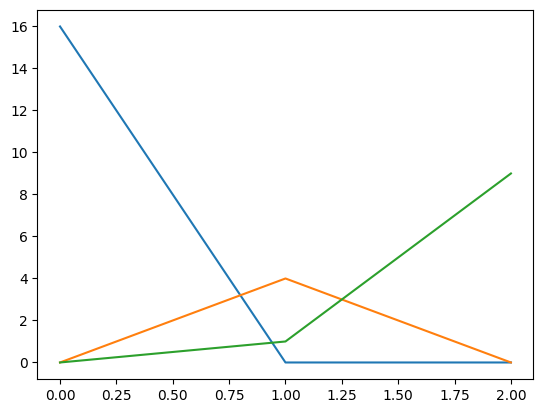

In [73]:
#29  Write a Python program to train a Decision Tree Classifier and visualize the confusion matrix using seaborn

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

df=load_iris()
x=df.data
y=df.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
confusion_matrix=confusion_matrix(y_test,y_pred)
print("confusion_matrix:",confusion_matrix)

plt.plot(confusion_matrix)
plt.show()





In [74]:
#30 Write a Python program to train a Decision Tree Classifier and use GridSearchCV to find the optimal values  for max_depth and min_samples_split.


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

df=load_iris()
x=df.data
y=df.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

from sklearn.model_selection import GridSearchCV
model=DecisionTreeClassifier()
params={'max_depth':[1,2,3,4,5],'min_samples_split':[2,3,4,5,6]}
grid=GridSearchCV(estimator=model,param_grid=params,cv=5,scoring='accuracy',verbose=3)
grid.fit(x_train,y_train)
print(" \nBest parameters:",grid.best_params_)
print("Best score:",grid.best_score_)





Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ..max_depth=1, min_samples_split=2;, score=0.667 total time=   0.0s
[CV 2/5] END ..max_depth=1, min_samples_split=2;, score=0.667 total time=   0.0s
[CV 3/5] END ..max_depth=1, min_samples_split=2;, score=0.667 total time=   0.0s
[CV 4/5] END ..max_depth=1, min_samples_split=2;, score=0.667 total time=   0.0s
[CV 5/5] END ..max_depth=1, min_samples_split=2;, score=0.625 total time=   0.0s
[CV 1/5] END ..max_depth=1, min_samples_split=3;, score=0.667 total time=   0.0s
[CV 2/5] END ..max_depth=1, min_samples_split=3;, score=0.667 total time=   0.0s
[CV 3/5] END ..max_depth=1, min_samples_split=3;, score=0.667 total time=   0.0s
[CV 4/5] END ..max_depth=1, min_samples_split=3;, score=0.667 total time=   0.0s
[CV 5/5] END ..max_depth=1, min_samples_split=3;, score=0.625 total time=   0.0s
[CV 1/5] END ..max_depth=1, min_samples_split=4;, score=0.667 total time=   0.0s
[CV 2/5] END ..max_depth=1, min_samples_split=4